# О проекте

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. 

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 
Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Первичный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

Посмотрим информацию

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим количество пустых значений

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на таблицу year_of_release, где имеются пустые значения.

In [6]:
data[data.Year_of_Release.isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Посмотрим на таблицу critic_score, где имеются пустые значения.

In [7]:
data[data.Critic_Score.isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Посмотрим на таблицу user_score, где имеются пустые значения.

In [8]:
data[data.User_Score.isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Посмотрим на таблицу rating, где имеются пустые значения.

In [9]:
data[data.Rating.isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Проверим, имеются ли у нас дулбикаты

In [10]:
data.duplicated().sum()

0

<b>Вывод:</b>

Мы импортировали необходимые библиотеки, необходимых для дальнешей работы, выгрузили таблицу с данными. Проверили какие типы данных в каждом столбце.
Выяснили, что нам нужно привести названия столбцов к нижнему регистру, также обнаружили, что в столбце year_of_release дробные числа, необходимо преобразовать в целое число. Также заметили пропуски в столбцах year_of_release, critic_score, user_score и rating, необходимо обработать эти пропуски. также проверили на наличие дубликатов, они отсутствуют. 

# Шаг 2. Предобработка

Приведем названия столбцов к нижнему регистру.

In [11]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В столбце year_of_release у нас дробное число, преобразуем в целочисленный тип.

In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Обработаем пропуски в столбце year_of_release, заполнив года от той же игры, только другой платформы.

In [13]:
data['year_of_release'].isna().sum()

269

In [14]:
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

И проверим, сколько нам удалось заполнить пустых значений

In [15]:
data['year_of_release'].isna().sum()

146

Теперь разберем значение tbd в столбце user_score. tbd это to be determined, значит данные специально не заполнили, т.к. не определились с рейтингом. Допустим это неизвестное число, думаю имеет смысл заменить на NaN.

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

Поменяем тип object столбца user_score на float. Чтобы были дробные числа.

In [17]:
data['user_score'] = data['user_score'].astype(float)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [19]:
data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Length: 16715, dtype: float64

In [20]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Изучим и опишем причины, которые могли привести к пропускам.

In [21]:
data.isna().sum()

name                  2
platform              0
year_of_release     146
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

Как мы видим, в 3 столбцах имеются пропуски. Это critic_score, user_score и rating. 

critic_score - это оценка критиков
user_score - оценка пользователей
rating = рейтинг от ESRB

Отсутствие оценок возможно из-за того, что игры только что вышли в продажу, и критики и пользователи еще не успели оценить. А возможно это просто недооцененные игры, т.е. критики и пользователи не получили игру (неинтересная игра), поэтому и не оценили. 

Проведем работу с пропусками в столбцах name, genre, year_of_release. Удаляем пропуски. 

In [22]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  total_sales      16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


<b>Вывод:</b>
1. Преобразовали столбец year_of_release в правильный тип.
2. Привели к нижнему регистру названия столбцов.
3. Заполнили пустые значения в столбце year_of_release.
4. Посчитали суммарные продажи во всех регионах и записали в столбец total_sales
5. Причины пропусков - скорее всего из-за того, что игры не дооцененные или только что вышедшие и оценить не успели.
6. Удалили пропуски в столбцах name. genre, year_of_release.

# Шаг 3. Исследовательский анализ

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

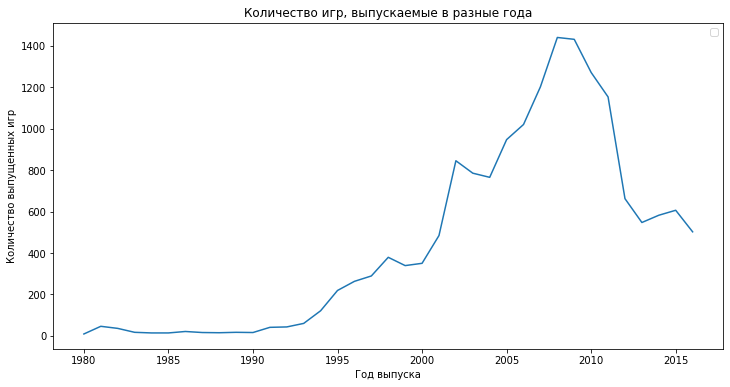

In [23]:
games_on_period = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр, выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

Согласно графику больше игры стали выпускать после 1992. Максимальное количество игр выпустили в 2008 и 2009 годах. 
Но после 2008 года мы видим спад количества игр. 

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0, 0.5, 'Продажи')

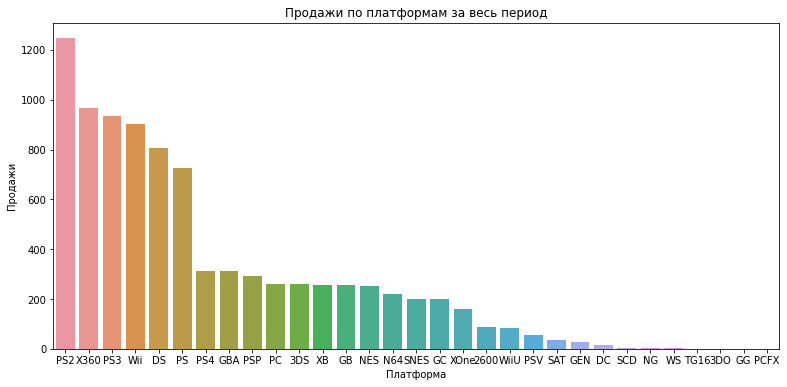

In [24]:
platform_on_sales = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Платформа")
plt.ylabel("Продажи")

Как мы видимо на графике, самые популярные игровые платформы: PS2, X360, PS3, Wii, DS и PS

Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года

In [25]:
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

Создадим таблицу по Топ-5 платформам и их общим продажам. 

In [26]:
top_5_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [27]:
top_5_platforms

,platform,total_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28


Посмотрим на количества продаж популярных платформ

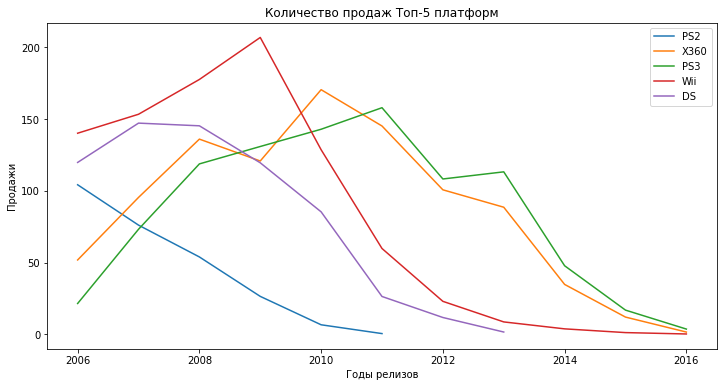

In [28]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж Топ-5 платформ')
plt.xlabel('Годы релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data)['total_sales'], label=i)
    plt.legend()

<b>Вывод:</b>
1. Средний срок службы игровой платформы - 9-10 лет 
2. Самые продаваемые платформы - X360 и PS3
3. У Wii был быстрый скачок в 2009 году и потом резкий провал.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Избавимся от выбросов.

In [29]:
list_of_top5 = ['PS2','X360','PS3','Wii','DS']
data_top_5_platforms = data[data['platform'].isin(['PS2','X360','PS3','Wii','DS'])]
data_top_5_platforms = data_top_5_platforms[data_top_5_platforms['total_sales']<1.4]

In [30]:
data_top_5_platforms['total_sales'].describe()

count    7388.000000
mean        0.281861
std         0.301415
min         0.000000
25%         0.060000
50%         0.160000
75%         0.400000
max         1.390000
Name: total_sales, dtype: float64

Построим "ящик с усами"

Text(0, 0.5, 'Продажи')

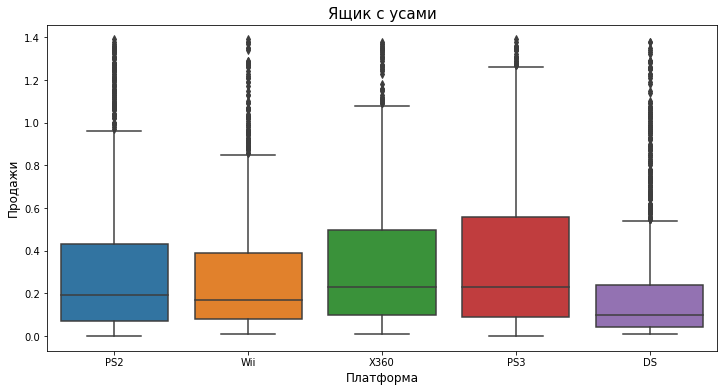

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)

<b>Вывод:</b>
1. Провели срез данных для того, чтоыб отрисовать ящики с усами. 
2. По графикам видно, что медиана протекает у всех по разному
3. Самые высокие продажи у PS3, потом у X360. Хуже всех у Wii и DS

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Корреляция между оценками пользователей и продажами.

In [32]:
ps3 = data[data['platform']=='PS3']
ps3['user_score'].corr(ps3['total_sales'])

0.12781061204589392

Построим диаграмму рассеяния.

Text(0.5, 1.0, 'test')

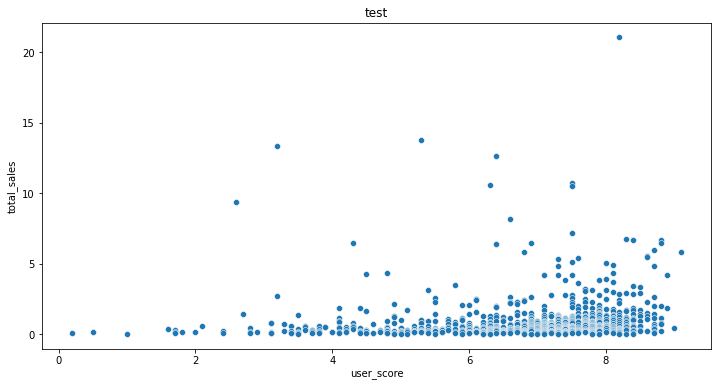

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps3)
plt.title('test')

Корреляция между оценкой критиков и продажам

In [34]:
ps3['critic_score'].corr(ps3['total_sales'])

0.432275045992511

Построим диаграмму рассеяния по оценкам критиков

Text(0.5, 1.0, 'test')

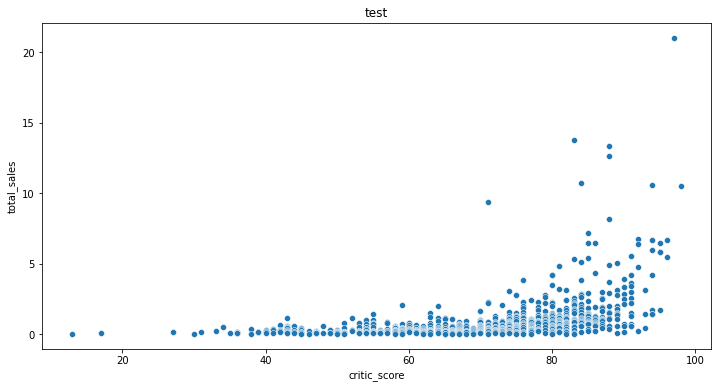

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps3)
plt.title('test')

Корреляция между оценкой критиков и продажам

In [36]:
ps3['critic_score'].corr(ps3['total_sales'])

0.432275045992511

Соотнесем выводы с продажами игр на других платформах.

Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции.

In [37]:
def other_platform_matrix(name_of_platform):
    platform = data[data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])

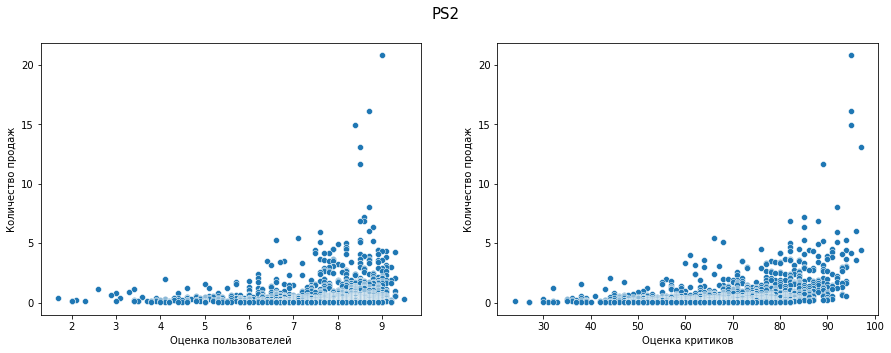

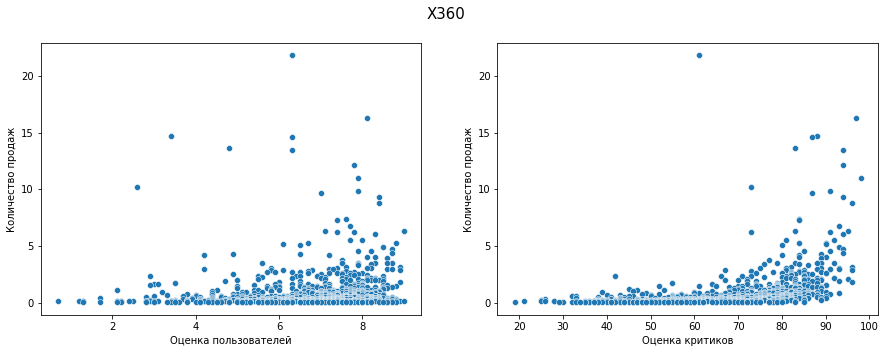

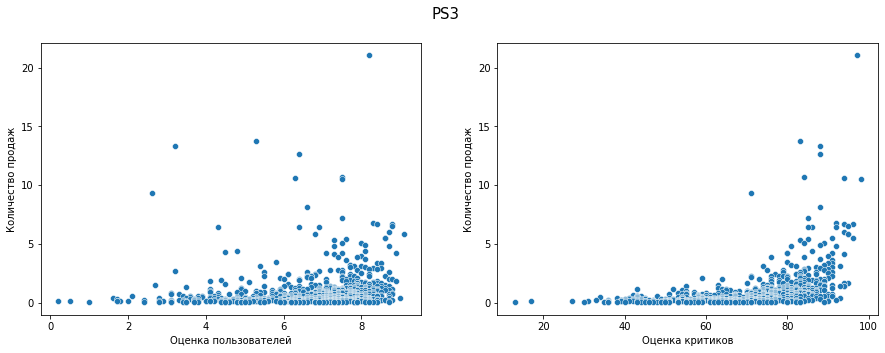

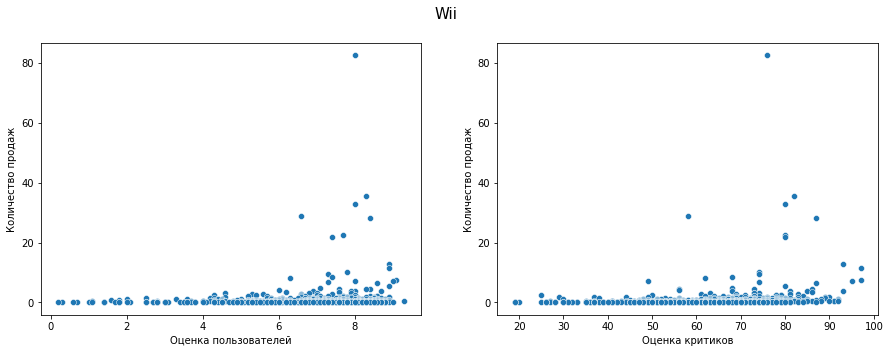

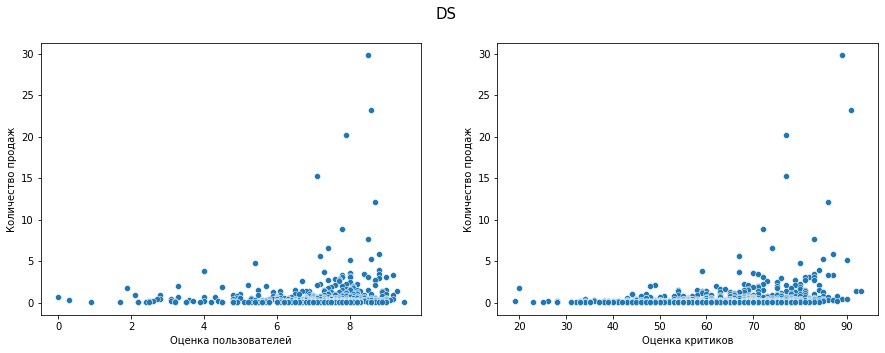

In [38]:
for platform in list_of_top5:
    other_platform_matrix(platform)

<b>PS2</b>
Корреляция между отзывами и платформой средняя.
Корреляция между отзывами и продажами низкая.

<b>X360</b>
Корреляция между отзывами и платформой средняя.
Корреляция между отзывами и продажами низкая.

<b>PS3</b>
Корреляция между отзывами и платформой средняя.
Корреляция между отзывами и продажами низкая.

<b>Wii</b>
Корреляция между отзывами и платформой низкая.
Корреляция между отзывами и продажами низкая.

<b>DS</b>
Корреляция между отзывами и платформой низкая.
Корреляция между отзывами и продажами низкая.

Сравним выводы с продажами игр на других платформах.

In [39]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,117.0,0.760769,0.966218,0.07,0.3100,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,515.0,0.502000,1.437252,0.01,0.0500,0.120,0.3350,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2129.0,0.377774,1.433447,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,813.0,0.385892,0.898630,0.01,0.0600,0.160,0.3900,15.84
GC,552.0,0.359891,0.688370,0.01,0.0600,0.150,0.3600,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


Построим диаграму размаха по всем платформам.

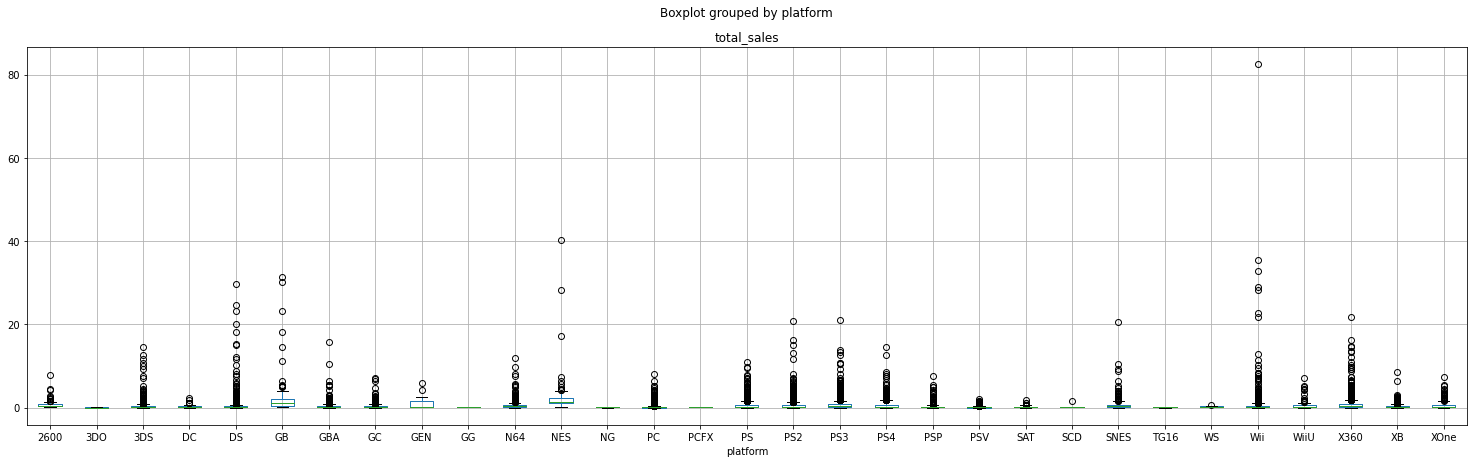

In [40]:
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.show()

Согласно диаграме мы видим редкие выбросы с продажами в 80 млн. Видимо только одна такая игра была самая популярная. Уберем выбросы и сужаем диапазон до 5 млн.

Сужаем диапазон до 5 млн продаж, для более наглядности.

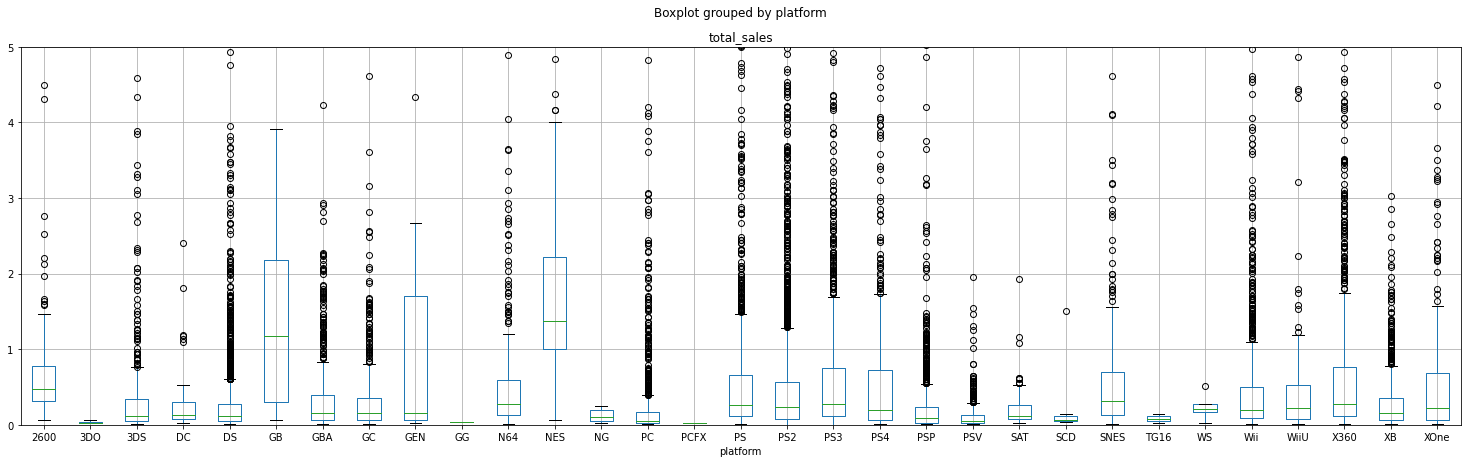

In [41]:
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.ylim(0, 5)
plt.show()

Согласно диаграме мы видим платформы, которые выделяются: PS, PS3, PS4, X360 и XOne. Границы этих платформ высокие, но при этом медиана у всех платформ не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.

Посмотрим на общее распределение игр по жанрам. 

In [42]:
distr_genre = data.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,Action,1735.63
1,Sports,1326.71
2,Shooter,1050.02
3,Role-Playing,931.77
4,Platform,826.03
5,Misc,794.41
6,Racing,725.82
7,Fighting,443.59
8,Simulation,388.46
9,Puzzle,240.54


Text(0, 0.5, 'Продажи')

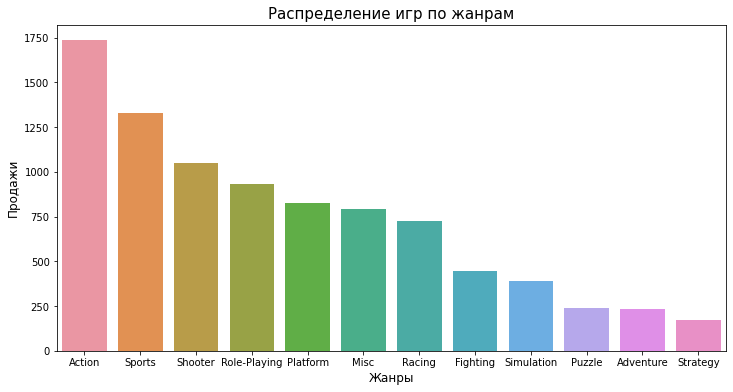

In [43]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Как мы видим, самый популярный жанр - экшн.
Самые непопулярный жанр - стратегия.

Рассмотрим популярность жанров на всех платформах за всё время.

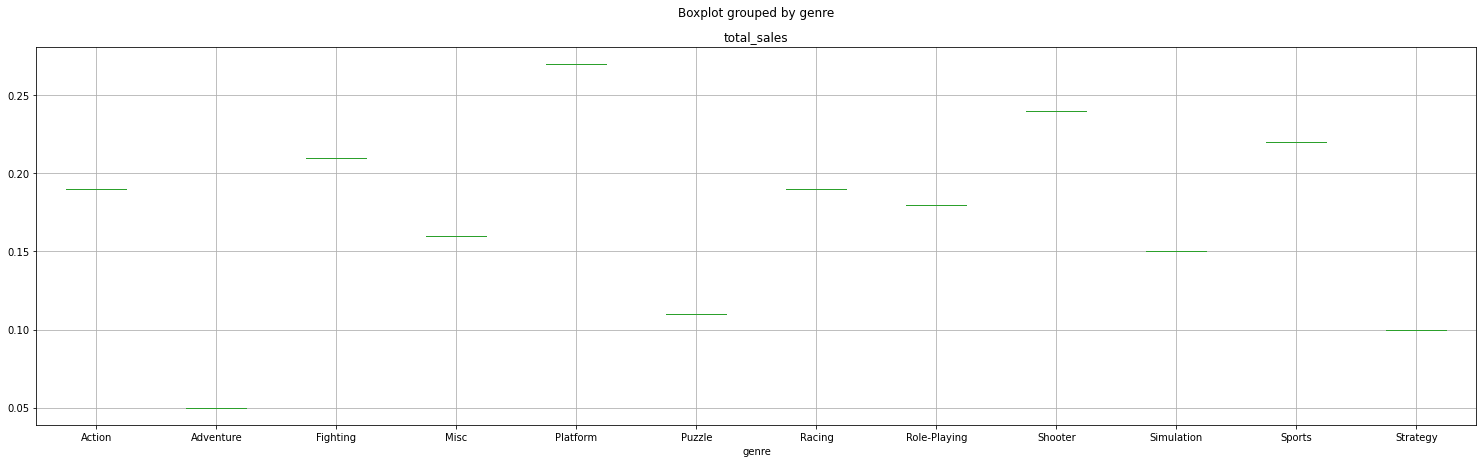

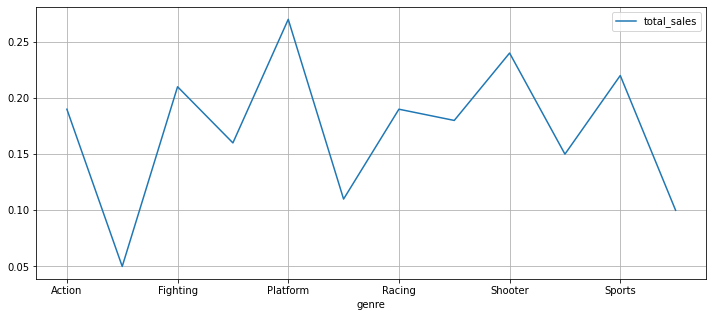

In [44]:
(
    data.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .boxplot(column='total_sales', by='genre', figsize=(25,7))
)
plt.show()
(
data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(12, 5))
)
plt.show()

Как мы видим, самые популярные жанры за всё время:
1. Platform
2. Shooter
3. Sport
4. Fighting
5. Action

Непопулярные жанры:
1. Adventure
2. Puzzle
3. Strategy
4. Simulation
5. Misc

Рассмотрим популярность жанров на всех платформах за последние годы.

In [45]:
actual_data = data.query('year_of_release > 2015')

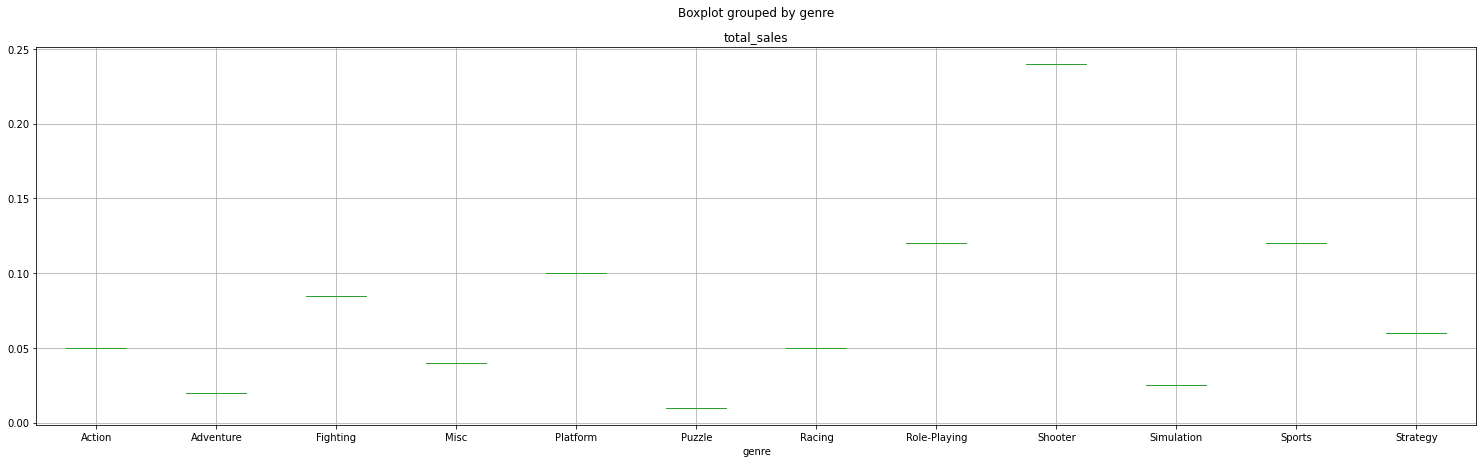

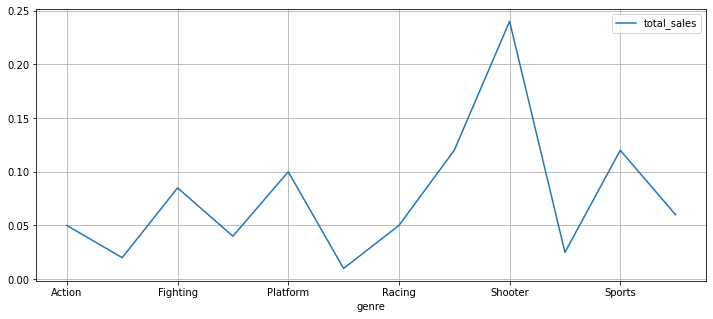

In [46]:
(
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.boxplot(column='total_sales', by='genre', figsize=(25,7))
)
plt.show()
(
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(12, 5))
)
plt.show()

Как мы видим, самые популярные жанры за последние годы (с 2015 по 2016):
1. Shooter
2. Sport
3. platform
4. Fighting
5. Action

Непопулярные жанры:
1. Puzzle
2. Adventure
3. Simulation
4. Misc
5. Strategy

<b>Вывод:</b>

Проведя исследовательский анализ, выяснили, что количество игр начало расти с 1992 большой скоростью, пик произошел в 2008-2009 годах, а после 2009 произошел резкий спад. 

Также выяснили, что самые популярные платформы PS2, X360, PS3, Wii, DS и PS. Средний срок жизни платформы составляет 9-10 лет. 

Игры больше всего продаются на платформах PS3 и X360. А у Wii в 2009 году был резкий скачок и в тот же год резкий спад. 

Провели корреляцию между оценками покеупателей \ критиков и продажами, пришли к выводу, что по оценкам покупателей \ критиков низкая корреляция. 

Также сравнили показатели по жанрам и выяснили, что за последние годы самые популярные жанры это Shooter, Sport, Platform, Fighting и Action.

А самые непопулярные жанры: Puzzle, Adventure, Simulation, Misc иStrategy.

# Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [47]:
def top_sale(df,col,arr1=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],arr2=['na_sales','eu_sales','jp_sales']):
    top_sale = df.pivot_table(index=col,values=arr1,aggfunc=sum)

    for i in arr2:        
        top_sale[f'{i}_ratio_sale'] = top_sale[i] / top_sale['total_sales'] * 100
        
    for i in arr2:
        print(f'Самые популярные платформы по региону {i[:2].upper()}')
        top_sale_ = top_sale.sort_values(by=i,ascending=False).head(5)
        top_sale_[f'{i}_ratio'] = top_sale_[i] / top_sale_[i].sum() * 100
        display(top_sale_[[i,f'{i}_ratio',f'{i}_ratio_sale']])
        print()
        print()    

In [48]:
top_sale(data,'platform')

Самые популярные платформы по региону NA


,na_sales,na_sales_ratio,na_sales_ratio_sale
platform,,,
X360,599.15,24.492791,61.984668
PS2,580.09,23.713633,46.512877
Wii,494.01,20.194749,54.688867
PS3,391.60,16.008307,41.873844
DS,381.38,15.590521,47.418809




Самые популярные платформы по региону EU


,eu_sales,eu_sales_ratio,eu_sales_ratio_sale
platform,,,
PS2,337.05,23.909682,27.025402
PS3,328.97,23.336502,35.176809
X360,269.79,19.138386,27.910947
Wii,261.48,18.548891,28.946873
PS,212.39,15.066540,29.191292




Самые популярные платформы по региону JP


,jp_sales,jp_sales_ratio,jp_sales_ratio_sale
platform,,,
DS,175.02,26.132919,21.761078
PS,139.78,20.871097,19.211633
PS2,137.74,20.566497,11.044293
SNES,116.55,17.402535,58.263347
3DS,100.64,15.026951,38.927784


По всем регионам PS2 входит в топ.
В Северной Америке самая популярная платформа - X360, по этой платформе 62% продаж в общем объеме.
В Европе самые популярные платформы - PS2 и PS3, но продаж больше у PS3 35% и Wii более 28%. 
В Японии самая популярная платформа DS. Но объем продаж больше у SNES.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). 

In [49]:
top_sale(data,'genre')

Самые популярные платформы по региону NA


,na_sales,na_sales_ratio,na_sales_ratio_sale
genre,,,
Action,873.70,29.202472,50.339070
Sports,681.69,22.784747,51.381990
Shooter,590.35,19.731807,56.222739
Platform,444.44,14.854924,53.804341
Misc,401.69,13.426051,50.564570




Самые популярные платформы по региону EU


,eu_sales,eu_sales_ratio,eu_sales_ratio_sale
genre,,,
Action,517.58,31.237288,29.820872
Sports,375.60,22.668429,28.310633
Shooter,316.96,19.129354,30.186092
Racing,235.47,14.211222,32.441928
Misc,211.32,12.753707,26.600874




Самые популярные платформы по региону JP


,jp_sales,jp_sales_ratio,jp_sales_ratio_sale
genre,,,
Role-Playing,353.88,39.849108,37.979330
Action,160.15,18.033894,9.227197
Sports,135.27,15.232250,10.195898
Platform,130.71,14.718766,15.823880
Misc,108.04,12.165982,13.600030


Жанры экшн и спорт входят в топ по всем регионам. 
В Америке самый популярный жанр - экшн, 50% от общих продаж и 29% от суммы продаж. 
В Европе, как и в Америке самый популярный жанр - экшн, более 29% от общих продаж и 31% от суммы продаж.
А в Японии самый популярный - Role-Playing, 38% от общих продаж и 39% от суммы продаж.

Определим для пользователя влияние рейтинга ESRB на продажи в отдельном регионе.

In [50]:
data_rating = data.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales','total_sales'],aggfunc=sum).sort_values(by='na_sales',ascending=False)

In [51]:
data_rating['eu_sales_rating'] = data_rating['eu_sales']/data_rating['total_sales']*100
data_rating['jp_sales_rating'] = data_rating['jp_sales']/data_rating['total_sales']*100
data_rating['na_sales_rating'] = data_rating['na_sales']/data_rating['total_sales']*100
data_rating

,eu_sales,jp_sales,na_sales,total_sales,eu_sales_rating,jp_sales_rating,na_sales_rating
rating,,,,,,,
E,709.20,198.02,1288.00,2428.99,29.197321,8.152360,53.026155
T,423.56,150.88,751.26,1479.19,28.634591,10.200177,50.788607
M,483.17,63.61,746.95,1470.58,32.855744,4.325504,50.792884
E10+,188.34,40.20,352.56,654.58,28.772648,6.141343,53.860491
K-A,0.27,1.46,2.56,4.32,6.250000,33.796296,59.259259
EC,0.11,0.00,1.53,1.75,6.285714,0.000000,87.428571
AO,0.61,0.00,1.26,1.96,31.122449,0.000000,64.285714
RP,0.04,0.00,0.00,0.05,80.000000,0.000000,0.000000


Самые популярные игры по всем регионам - с рейтингом E (для детей от 3 лет). 
На 2 месте по популярности игр по всем регионам это с рейтингом T (для детей от 10 лет).

Составим портерт самых популярных платформ.

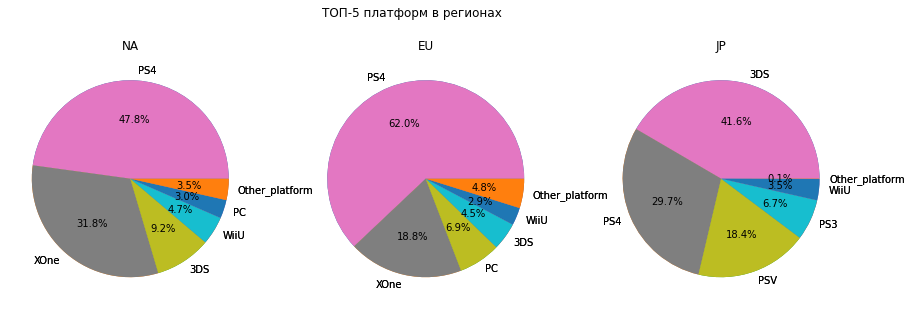

In [52]:
countries = actual_data.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  data_i = (actual_data.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))

  data_i = data_i.append({'platform': 'Other_platform', countries[i]: actual_data[countries[i]].sum() - data_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(data_i[countries[i]], labels = data_i['platform'])
  axs[i].pie(data_i[countries[i]], labels = data_i['platform'], autopct='%1.1f%%')

  axs[i].set_title(data_i.columns[1].split('_')[0].upper())
plt.show()

Разница между регионами ощутима.

Можно отметить сходство Северной Америки и Европы в том плане, что в обеих регионах на первом месте стоит платформа PS4, а второе место занимает с небольшим отрывом XOne. Япония по сравнению с другими регионами своеобразна, здесь на первом месте стоит 3DS, второе место занимает PS4, и на третьем находится PSV.

Составим портрет самых популярных жанров.

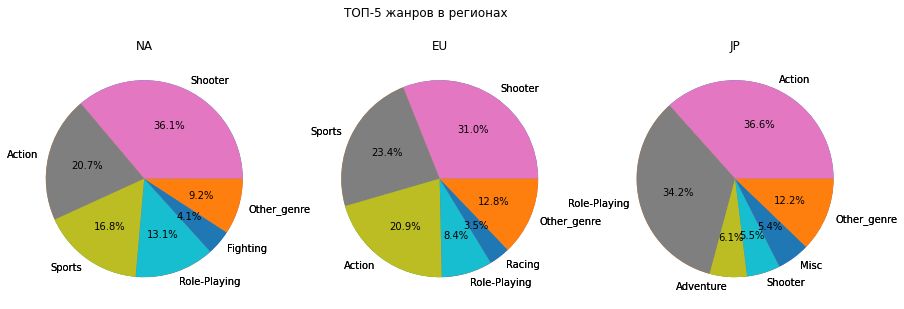

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  data_i = (actual_data.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))

  data_i = data_i.append({'genre': 'Other_genre', countries[i]: actual_data[countries[i]].sum() - data_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(data_i[countries[i]], labels = data_i['genre'])
  axs[i].pie(data_i[countries[i]], labels = data_i['genre'], autopct='%1.1f%%')

  axs[i].set_title(data_i.columns[1].split('_')[0].upper())
plt.show()

На диаграммах видно, что первое место в Северной Америке и Европе занимают Шутеры, а в Японии – Экшн. 
По вторым местам у Северной Америки экшн, у Европы спорт, а у Японии ролевые инпы.

Из данных диаграмм можно сделать вывод, что вкусовые предпочтения зависят от культуры и места проживания, т.к. во всех регионах показатели сильно разнятся.

Составим портрет, влияет ли рейтинг ESRB на продажи в отдельном регионе.

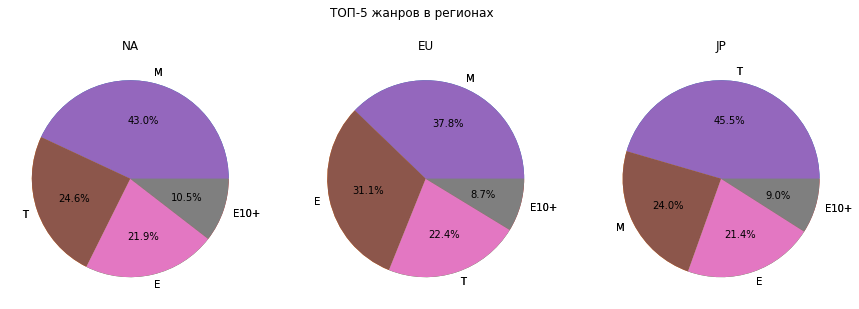

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  data_i = (actual_data.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(data_i[countries[i]], labels = data_i['rating'])
  axs[i].pie(data_i[countries[i]], labels = data_i['rating'], autopct='%1.1f%%')
  axs[i].set_title(data_i.columns[1].split('_')[0].upper())
plt.show()

На данных диаграммах видно, что рейтинг ESRB не сильно влияет на продажи, так как распределение среди рейтингов примерно одинаковое. Исключение составляет Япония, в данном регионе, пользователи любят игры категории T (от 13 лет). Если посмотреть на диаграммы Европы и Северной Америки повнимательнее, то можно выделить категорию М - для взрослых, она занимает большее место на рынке среди других игр.

<b>Вывод</b>

<b>Портрет пользователя Северной америки</b>
- Любит играть в PS4, а иногда и в XOne.
- Любимый жанр - шутер, а потом и экшн.
- Любит много крови (жанр для взрослых).

<b>Портрет пользователя Европы</b>
- Любит играть в PS4.
- Любимый жанр - шутер, а потом и спорт (в футбол поиграть).
- Любит много крови и игры для всех, т.е. жанры Т и Е (Е - для всех, например спортивные игры)

<b>Портрет пользователя Японии</b>
- Любит играть в 3DS.
- Любимый жанр - экшн, а потом и ролевые игры.
- Любит игры от 13 лет (в 3DS видимо часто игры от 13 лет)




# Шаг 5. Проверка гипотез.

<b>Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".</b>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind ()

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [55]:
data_2014 = data.query('year_of_release >= 2014')

In [56]:
score = data_2014[data_2014['user_score'] != -10]

print('Средний пользовательский рейтинг платформ Xbox One', round(score.query('platform == "XOne"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(score.query('platform == "PC"')['user_score'].mean(),2))
print()

alpha = 0.05

results = st.ttest_ind(score[(score['platform'] == 'XOne')  & (~score['user_score'].isna())]['user_score'],
                       score[(score['platform'] == 'PC') & (~score['user_score'].isna())]['user_score'],
                       equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформ Xbox One 6.59
Средний пользовательский рейтинг платформ PC 6.32

p-значение: 0.139237120435483
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b>

p-значение 13,9%, мы не можем отвергнуть нулевую гипотезу. 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<b>Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные"</b>

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind ()

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [57]:
print('Средний пользовательский рейтинг жанра Action', round(score.query('genre == "Action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра Sport', round(score.query('genre == "Sports"')['user_score'].mean(),2))
print()

alpha = 0.05

results = st.ttest_ind(score[(score['genre'] == 'Action') & (~score['user_score'].isna())]['user_score'],
                       score[(score['genre'] == 'Sports') & (~score['user_score'].isna())]['user_score'],
                       equal_var = False
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action 6.77
Средний пользовательский рейтинг жанра Sport 5.23

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


<b>Вывод:</b>

p-значение менее 5%, мы можем отвергнуть нулевую гипотезу и не отвергать альтернативную гипотезу.

Средние пользовательские рейтинги жанров Action и Sports различаются.

# Шаг 6. Общий вывод.

Мы подготовили данные, привели к нижнему регистру названия столбцов. Также преобразовали к правильным типам данных нужные таблицы. Обработали пропуски в колонке year_of_release. Разобрали tbd, заменили tbd на NaN для проведения дальнейшего анализа.

Анализируя таблицу, мы обнаружили, что резкий рост количества игр начался в 1992 году большой скоростью до 2008 года, в 2009 году начался резкий спад. 

Самые популярные платформы PS2, X360, PS3, Wii, DS, PS.

В 2009 году был резкий скачок на Wii, и в тот же год произошел резкий спад. Я так полагаю, рекламная кампания была привлкательной, все ждали анонса, а потом, когда поступила в продажу, все разочаровались и пошел спад.

Средний срок жизни - 9-10 лет.

Проанализировали оценку пользователей и критиков и выявили, что оценки критиков и пользователей взаимосвязаны с продажами. То есть чем лучше оценка, тем лучше продажа игры. 

Определили, что самый популярный жанр - шутер, а самый непопулярный - паззл. 

Составили портреты пользователей каждого региона, выяснили, что в Северной Америке и Европе популярная платформа PS4, в Японии 3DS. Жанры игр страны предпочитают разные, но большинство склоняется к жанру шутер, т.е. в Америке очень любят шутер и экшн, в Европе шутер и спортивные игры, а в Японии экшн и ролевые игры. В Америке и Европе предпочитают игры с рейтингом М, для взрослых. А в Японии с рейтингом Т, т.е. от 13 лет. 

Также проверили гипотезы. По платформам XOne и PC не отвергаем гипотезу, что средние пользовтаельские рейтинги одинаковые. А по жанрам Action и Sport отвергаем гипотезу, что средние пользовательские рейтинги одинаковые. 

Таким образом, определяющие успешность игры закономерности: это отзывы критиков, платформа, жанр, рейтинг, этап жизненного цикла платформы. 

Влияние рейтинга, жанра зависит от региона продажи платформы.